# Загрука данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('datasets/HW3/train.csv')

In [3]:
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [4]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [42]:
data.loc[data['TotalSpent'] == " ", "TotalSpent"] = np.NaN
# data['TotalSpent'] = data['TotalSpent'].astype(float)
data[num_cols] = data[num_cols].astype(float)
data[num_cols] = data[num_cols].fillna(data[num_cols].mean(numeric_only=True))

In [45]:
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].replace({1: 'Yes', 0: 'No'})

In [46]:
data[cat_cols].head()

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,No,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,No,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


# Анализ данных

## Работа с количественными признаками

### Построение гистограмм

In [47]:
from matplotlib import colors

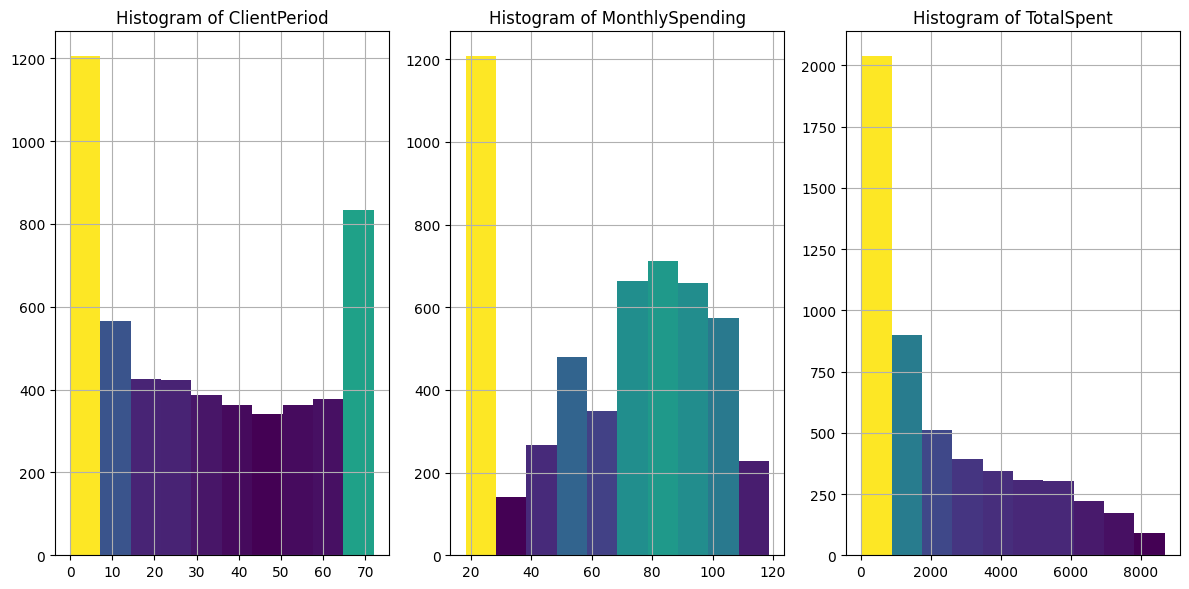

In [48]:
fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=True, figsize=(12,6))


for i, col in enumerate(num_cols):
    N, bins, patches = axs[i].hist(data[col])
    fracs = N / N.max()
    norm = colors.Normalize(fracs.min(), fracs.max())
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)
    axs[i].set_title(f'Histogram of {col}')
    axs[i].grid(True)    

### Построение "ящиков с усами"

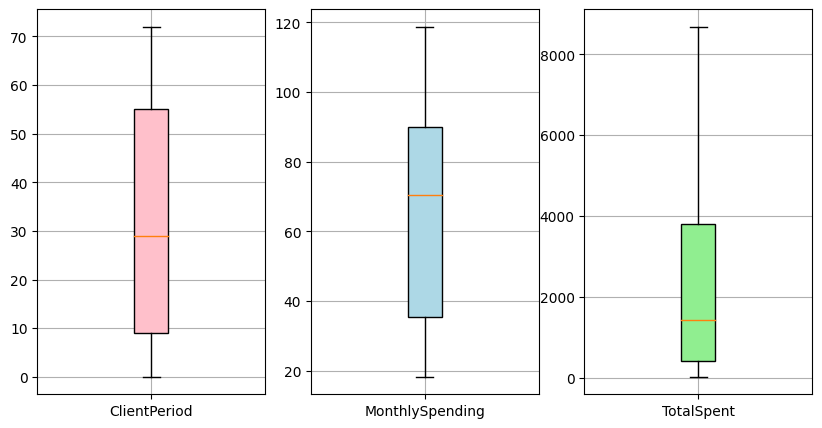

In [49]:
fig, axs = plt.subplots(1, len(num_cols), figsize=(10, 5), sharey=False)

colors = ['pink', 'lightblue', 'lightgreen']

for ax, col, color in zip(axs, num_cols, colors):
    bplot = ax.boxplot(data[col], vert=True, patch_artist=True, labels=[col])
    for patch in bplot['boxes']:
        patch.set_facecolor(color)

    ax.grid(True)
plt.show()

## Работа с категориальными признаками

In [50]:
for col in data[cat_cols]:
    print(col, data[col].value_counts(), sep='\n', end='\n\n')

Sex
Male      2655
Female    2627
Name: Sex, dtype: int64

IsSeniorCitizen
No     4440
Yes     842
Name: IsSeniorCitizen, dtype: int64

HasPartner
No     2705
Yes    2577
Name: HasPartner, dtype: int64

HasChild
No     3676
Yes    1606
Name: HasChild, dtype: int64

HasPhoneService
Yes    4761
No      521
Name: HasPhoneService, dtype: int64

HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64

HasDeviceProtection
No                     2317
Yes                    1824
No internet service    114

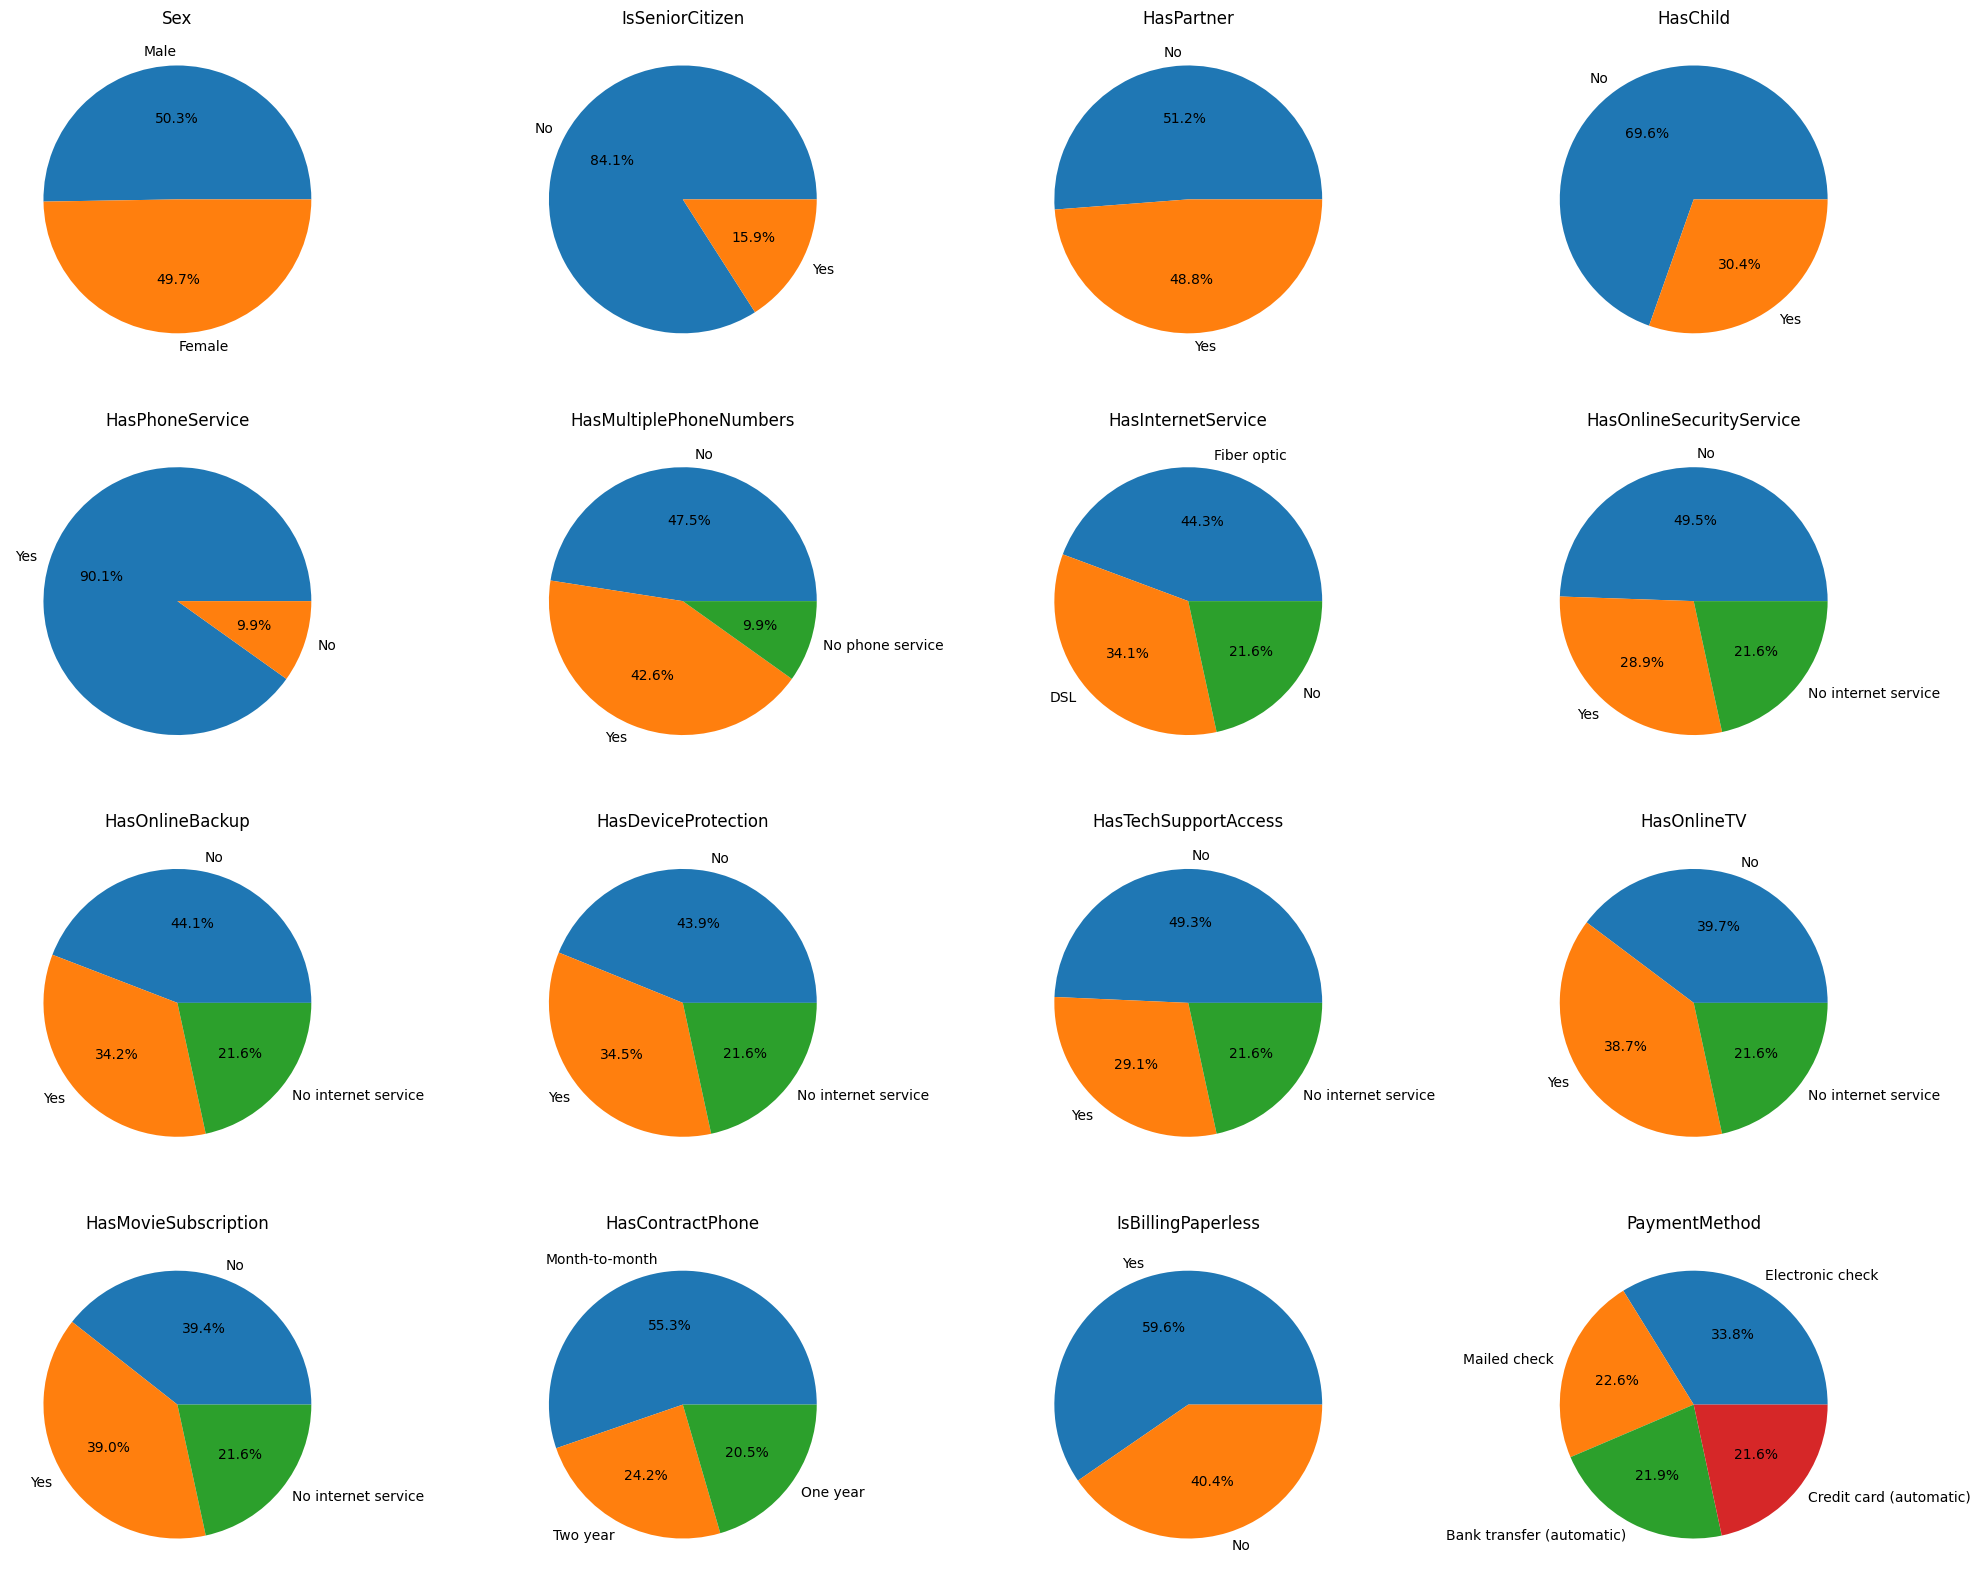

In [51]:
fig, axes = plt.subplots(4, 4, figsize=(25, 20))
for ax, col in zip(axes.flatten(), data[cat_cols].columns):
    ax.set_title(col)
    ax.pie(data[col].value_counts(), autopct="%1.1f%%", labels=data[col].value_counts().index)

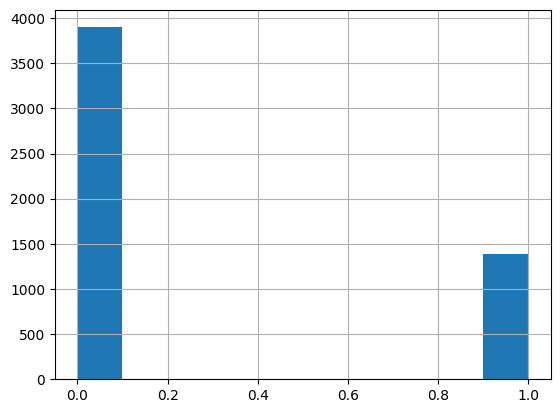

In [52]:
data['Churn'].hist()
plt.show()

# Построение моделей

In [53]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from scipy.sparse import csr_matrix

In [54]:
dummy_features = pd.get_dummies(data[cat_cols])
X = pd.concat([data[num_cols], dummy_features], axis=1)
y = data[target_col]

# X_sparse = csr_matrix(pd.concat([data[num_cols], dummy_features], axis=1))

# # Разделение данных на тренировочный и тестовый наборы
# X_train_sparse, X_test_sparse, y_train, y_test = train_test_split(X_sparse, data[target_col],
#                                                     train_size=0.8,
#                                                     random_state=42)

# # Масштабирование числовых признаков (если требуется)
# scaler = StandardScaler(with_mean=False)
# X_train_scaled = scaler.fit_transform(X_train_sparse[:,:len(num_cols)])
# X_test_scaled = scaler.transform(X_test_sparse[:,:len(num_cols)])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X.values, data[target_col].values,
                                                    train_size=0.8,
                                                    random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

## Logistic regression

In [19]:
parameters = {'C':[100, 10, 1, 0.1, 0.01, 0.001], 
             'penalty':['l1', 'l2', 'elasticnet'],
              'max_iter':[100,200,500,1000],
              'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
             }

CV_model = GridSearchCV(estimator=LogisticRegression(),
                        param_grid=parameters,
                        cv=5,
                        scoring='roc_auc',
                        refit=True,
                        n_jobs=-1,
                        verbose=10)
CV_model.fit(X_train_scaled, y_train)




Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bogdan/opt/miniconda3/lib/python3

/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bogdan/opt/miniconda3/lib/python3

[CV 1/5; 2/432] START C=100, max_iter=100, penalty=l1, solver=liblinear.........
[CV 1/5; 2/432] END C=100, max_iter=100, penalty=l1, solver=liblinear;, score=0.829 total time=   2.4s
[CV 1/5; 21/432] START C=100, max_iter=200, penalty=l1, solver=newton-cg........
[CV 1/5; 21/432] END C=100, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 21/432] START C=100, max_iter=200, penalty=l1, solver=newton-cg........
[CV 2/5; 21/432] END C=100, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5; 21/432] START C=100, max_iter=200, penalty=l1, solver=newton-cg........
[CV 5/5; 21/432] END C=100, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5; 22/432] START C=100, max_iter=200, penalty=l1, solver=newton-cholesky..
[CV 1/5; 22/432] END C=100, max_iter=200, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5; 22/432] START C=100, max_iter=200, penalty=l1, solver=newton-cholesky

/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bogdan/opt/miniconda3/lib/python3

[CV 3/5; 1/432] START C=100, max_iter=100, penalty=l1, solver=lbfgs.............
[CV 3/5; 1/432] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5; 3/432] START C=100, max_iter=100, penalty=l1, solver=newton-cg.........
[CV 1/5; 3/432] END C=100, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 3/432] START C=100, max_iter=100, penalty=l1, solver=newton-cg.........
[CV 2/5; 3/432] END C=100, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5; 3/432] START C=100, max_iter=100, penalty=l1, solver=newton-cg.........
[CV 4/5; 3/432] END C=100, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5; 4/432] START C=100, max_iter=100, penalty=l1, solver=newton-cholesky...
[CV 1/5; 4/432] END C=100, max_iter=100, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5; 4/432] START C=100, max_iter=100, penalty=l1, solver=newton-cholesky...
[CV 3/5

[CV 5/5; 1/432] START C=100, max_iter=100, penalty=l1, solver=lbfgs.............
[CV 5/5; 1/432] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5; 3/432] START C=100, max_iter=100, penalty=l1, solver=newton-cg.........
[CV 3/5; 3/432] END C=100, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5; 3/432] START C=100, max_iter=100, penalty=l1, solver=newton-cg.........
[CV 5/5; 3/432] END C=100, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 4/432] START C=100, max_iter=100, penalty=l1, solver=newton-cholesky...
[CV 2/5; 4/432] END C=100, max_iter=100, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5; 4/432] START C=100, max_iter=100, penalty=l1, solver=newton-cholesky...
[CV 4/5; 4/432] END C=100, max_iter=100, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5; 5/432] START C=100, max_iter=100, penalty=l1, solver=sag...............
[

[CV 1/5; 1/432] START C=100, max_iter=100, penalty=l1, solver=lbfgs.............
[CV 1/5; 1/432] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5; 2/432] START C=100, max_iter=100, penalty=l1, solver=liblinear.........
[CV 4/5; 2/432] END C=100, max_iter=100, penalty=l1, solver=liblinear;, score=0.863 total time=   1.9s
[CV 4/5; 12/432] START C=100, max_iter=100, penalty=l2, solver=saga.............
[CV 4/5; 12/432] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.863 total time=   0.3s
[CV 5/5; 12/432] START C=100, max_iter=100, penalty=l2, solver=saga.............
[CV 5/5; 12/432] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.860 total time=   0.3s
[CV 2/5; 24/432] START C=100, max_iter=200, penalty=l1, solver=saga.............
[CV 2/5; 24/432] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.836 total time=   0.8s
[CV 3/5; 24/432] START C=100, max_iter=200, penalty=l1, solver=saga.............
[CV 3/5; 24/432] 

[CV 1/5; 67/432] END C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5; 67/432] START C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs...
[CV 2/5; 67/432] END C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5; 67/432] START C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs...
[CV 3/5; 67/432] END C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5; 67/432] START C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs...
[CV 4/5; 67/432] END C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5; 67/432] START C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs...
[CV 5/5; 67/432] END C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5; 68/432] START C=100, max_iter=1000, penalty=elasticnet, solver=liblinear
[CV 1/5; 68/432] END C=100, max_iter=1000, penalty=elasticn

[CV 1/5; 124/432] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5; 124/432] START C=10, max_iter=500, penalty=elasticnet, solver=newton-cholesky
[CV 2/5; 124/432] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5; 124/432] START C=10, max_iter=500, penalty=elasticnet, solver=newton-cholesky
[CV 3/5; 124/432] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5; 124/432] START C=10, max_iter=500, penalty=elasticnet, solver=newton-cholesky
[CV 4/5; 124/432] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5; 124/432] START C=10, max_iter=500, penalty=elasticnet, solver=newton-cholesky
[CV 5/5; 124/432] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5; 125/432] START C=10, max_iter=500, penalty=elasticnet, solver=s

[CV 4/5; 164/432] START C=1, max_iter=200, penalty=l1, solver=liblinear.........
[CV 4/5; 164/432] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.861 total time=   0.2s
[CV 5/5; 164/432] START C=1, max_iter=200, penalty=l1, solver=liblinear.........
[CV 5/5; 164/432] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.860 total time=   0.4s
[CV 3/5; 175/432] START C=1, max_iter=200, penalty=elasticnet, solver=lbfgs.....
[CV 3/5; 175/432] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5; 175/432] START C=1, max_iter=200, penalty=elasticnet, solver=lbfgs.....
[CV 4/5; 175/432] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5; 175/432] START C=1, max_iter=200, penalty=elasticnet, solver=lbfgs.....
[CV 5/5; 175/432] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5; 176/432] START C=1, max_iter=200, penalty=elasticnet, solver=libl

[CV 1/5; 78/432] START C=10, max_iter=100, penalty=l1, solver=saga..............
[CV 1/5; 78/432] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.830 total time=   0.4s
[CV 2/5; 78/432] START C=10, max_iter=100, penalty=l1, solver=saga..............
[CV 2/5; 78/432] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.836 total time=   0.4s
[CV 3/5; 78/432] START C=10, max_iter=100, penalty=l1, solver=saga..............
[CV 3/5; 78/432] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.855 total time=   0.4s
[CV 1/5; 93/432] START C=10, max_iter=200, penalty=l1, solver=newton-cg.........
[CV 1/5; 93/432] END C=10, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 93/432] START C=10, max_iter=200, penalty=l1, solver=newton-cg.........
[CV 2/5; 93/432] END C=10, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5; 93/432] START C=10, max_iter=200, penalty=l1, solver=newton-cg.........
[CV 3/5; 93/432] E

[CV 3/5; 226/432] START C=0.1, max_iter=100, penalty=l2, solver=newton-cholesky.
[CV 3/5; 226/432] END C=0.1, max_iter=100, penalty=l2, solver=newton-cholesky;, score=0.855 total time=   0.0s
[CV 4/5; 226/432] START C=0.1, max_iter=100, penalty=l2, solver=newton-cholesky.
[CV 4/5; 226/432] END C=0.1, max_iter=100, penalty=l2, solver=newton-cholesky;, score=0.861 total time=   0.0s
[CV 5/5; 226/432] START C=0.1, max_iter=100, penalty=l2, solver=newton-cholesky.
[CV 5/5; 226/432] END C=0.1, max_iter=100, penalty=l2, solver=newton-cholesky;, score=0.861 total time=   0.0s
[CV 1/5; 227/432] START C=0.1, max_iter=100, penalty=l2, solver=sag.............
[CV 1/5; 227/432] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.827 total time=   0.1s
[CV 2/5; 227/432] START C=0.1, max_iter=100, penalty=l2, solver=sag.............
[CV 2/5; 227/432] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.833 total time=   0.1s
[CV 4/5; 230/432] START C=0.1, max_iter=100, penalty=elasticnet,

[CV 2/5; 151/432] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.835 total time=   0.0s
[CV 3/5; 151/432] START C=1, max_iter=100, penalty=l2, solver=lbfgs.............
[CV 3/5; 151/432] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.856 total time=   0.0s
[CV 4/5; 151/432] START C=1, max_iter=100, penalty=l2, solver=lbfgs.............
[CV 4/5; 151/432] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.862 total time=   0.0s
[CV 2/5; 152/432] START C=1, max_iter=100, penalty=l2, solver=liblinear.........
[CV 2/5; 152/432] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.835 total time=   0.0s
[CV 3/5; 152/432] START C=1, max_iter=100, penalty=l2, solver=liblinear.........
[CV 3/5; 152/432] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.856 total time=   0.0s
[CV 4/5; 154/432] START C=1, max_iter=100, penalty=l2, solver=newton-cholesky...
[CV 4/5; 154/432] END C=1, max_iter=100, penalty=l2, solver=newton-cholesky;, score=0.862 to

/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1200 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1168, in fit
   

/Users/bogdan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='roc_auc', verbose=10)

In [20]:
CV_model.best_params_

{'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}

In [21]:
model = LogisticRegression(penalty='l2', C=10, max_iter=10000, solver='saga')
model.fit(X_train, y_train)
y_train_predicted = model.predict_proba(X_train_scaled)[:, 1]


In [22]:
y_test_predicted = model.predict_proba(X_test_scaled)[:, 1]

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve

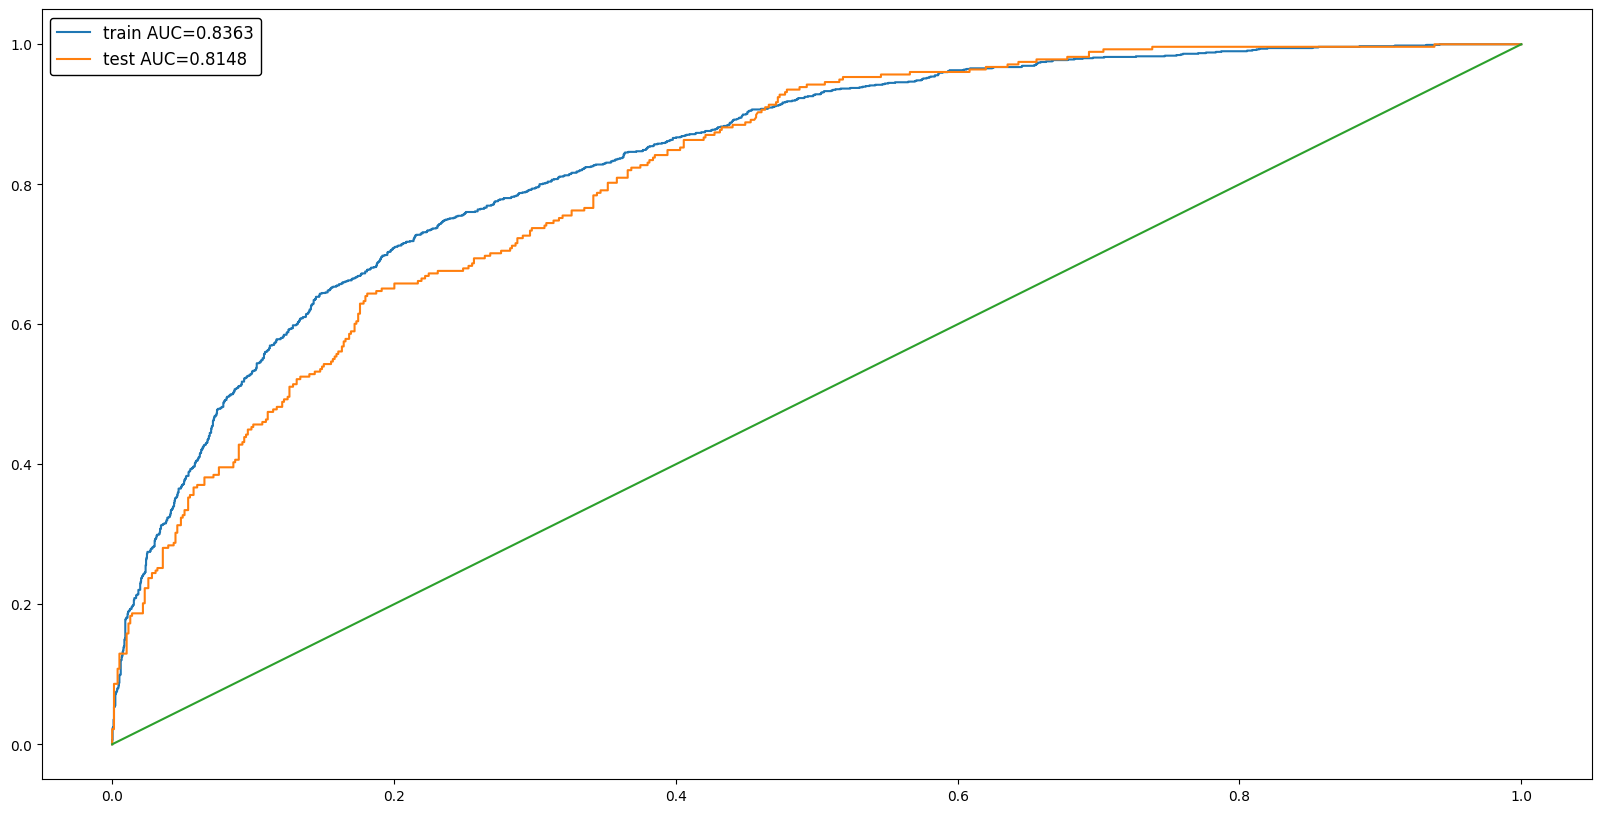

In [24]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

## Bagging

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm

In [26]:
max_trees = 100

values = np.arange(max_trees) + 1

kf = KFold(n_splits=5, shuffle=True, random_state=42)

global_scores = []

for train_indices, val_indices in tqdm(kf.split(X_train), total=5):
    scores = []

    X_train_kf = X_train[train_indices]
    y_train_kf = y_train[train_indices]

    X_val_kf = X_train[val_indices]
    y_val_kf = y_train[val_indices]

    forest = RandomForestClassifier(n_estimators=max_trees)
    forest.fit(X_train_kf, y_train_kf)
    trees = forest.estimators_

    for number_of_trees in tqdm(values, leave=False):
        thinned_forest = RandomForestClassifier(n_estimators=number_of_trees)

        thinned_forest.n_classes_ = 2
        thinned_forest.estimators_ = trees[:number_of_trees]

        scores.append(roc_auc_score(y_val_kf, thinned_forest.predict_proba(X_val_kf)[:, 1]))

    scores = np.array(scores)

    global_scores.append(scores)

global_scores = np.stack(global_scores, axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

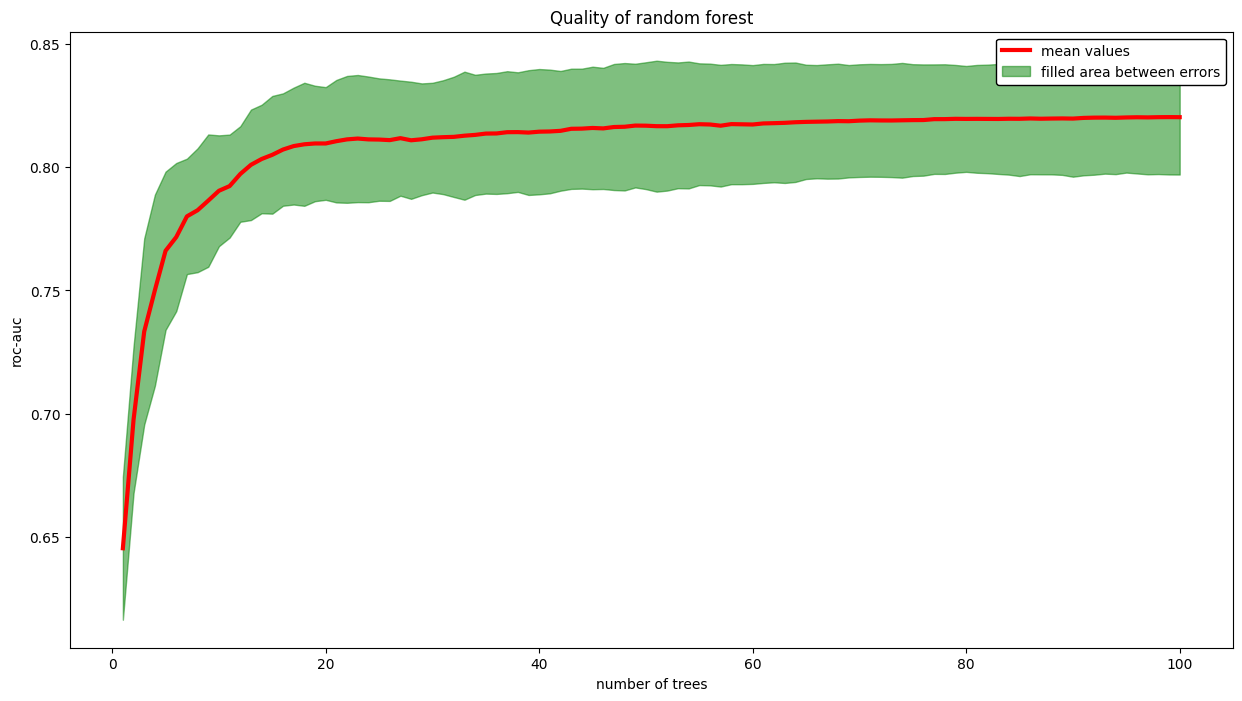

In [27]:
mean_cross_val_score = global_scores.mean(axis=0)
std_cross_val_score = global_scores.std(axis=0)

plt.figure(figsize=(15,8))
plt.title('Quality of random forest')

plt.plot(values, mean_cross_val_score, label='mean values', color='red', lw=3)
plt.fill_between(values,
                 mean_cross_val_score - 2 * std_cross_val_score,
                 mean_cross_val_score + 2 * std_cross_val_score,
                 color='green',
                 label='filled area between errors',
                 alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('number of trees')
plt.ylabel('roc-auc')

plt.show()

In [28]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_train_predicted = model.predict_proba(X_train_scaled)[:, 1]
y_test_predicted = model.predict_proba(X_test_scaled)[:, 1]

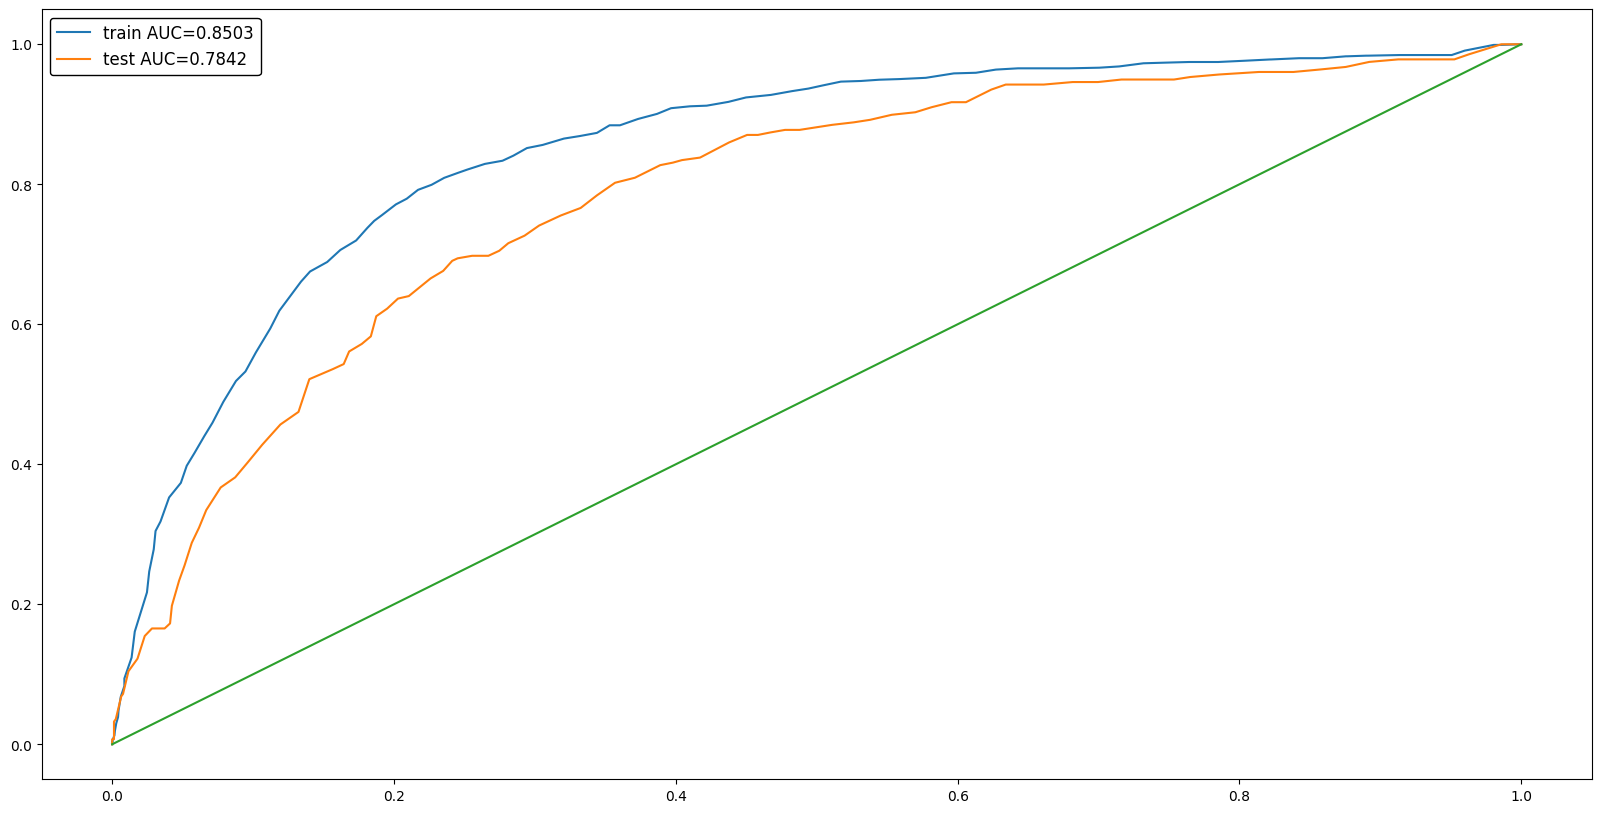

In [29]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

## Boosting

In [34]:
import catboost

In [66]:
data[feature_cols]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55.0,19.50,1026.35,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72.0,25.85,1872.20,Male,No,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1.0,75.90,75.90,Male,No,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32.0,79.30,2570.00,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60.0,115.25,6758.45,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3.0,30.40,82.15,Male,No,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5278,50.0,44.45,2188.45,Male,No,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5279,1.0,55.05,55.05,Male,No,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5280,29.0,76.00,2215.25,Female,No,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [74]:
cat_indices = [x for x in range(3, len(feature_cols))]
cat_indices

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [76]:
c_boost = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                     cat_features=cat_indices,
                                     eval_metric='AUC')


In [81]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
X_test_cb.shape, X_train_cb.shape

((1057, 19), (4225, 19))

In [83]:
c_boost.fit(X_train_cb, y_train_cb)

y_train_predicted = c_boost.predict_proba(X_train_cb)[:, 1]
y_test_predicted = c_boost.predict_proba(X_test_cb)[:, 1]

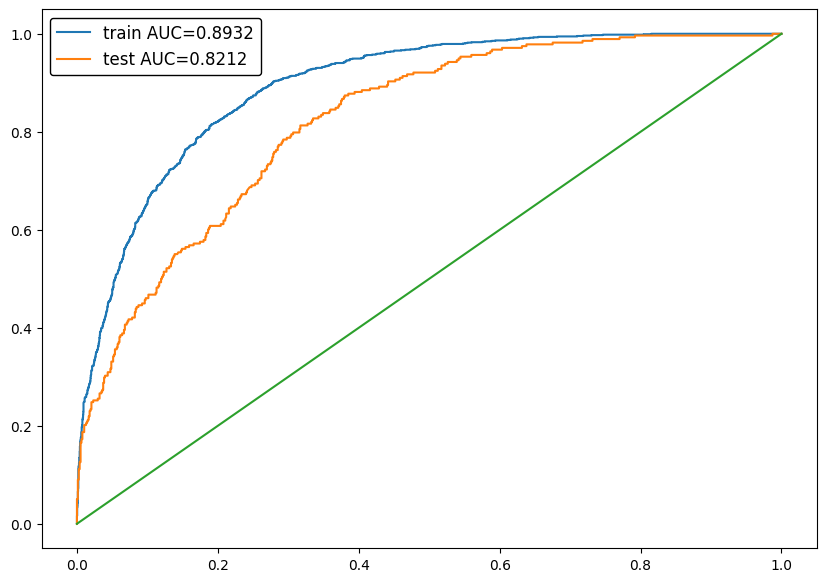

In [84]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

## Final


In [92]:
best_model = c_boost